#  1. Importar y revision inicial de los datos

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
path = "Data/"
dato = "PFDA_People_analytics.csv"
df=pd.read_csv(f"{path}{dato}", sep= ";")

In [24]:
sns.set(style="whitegrid")

# Pregunta de analisis para exponer

### ¿La rotación es mayor en ciertos cargos, áreas o salarios?

In [25]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1.0,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4.0,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2.0,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3.0,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4.0,80,1,6,3,3,2,2,2,2


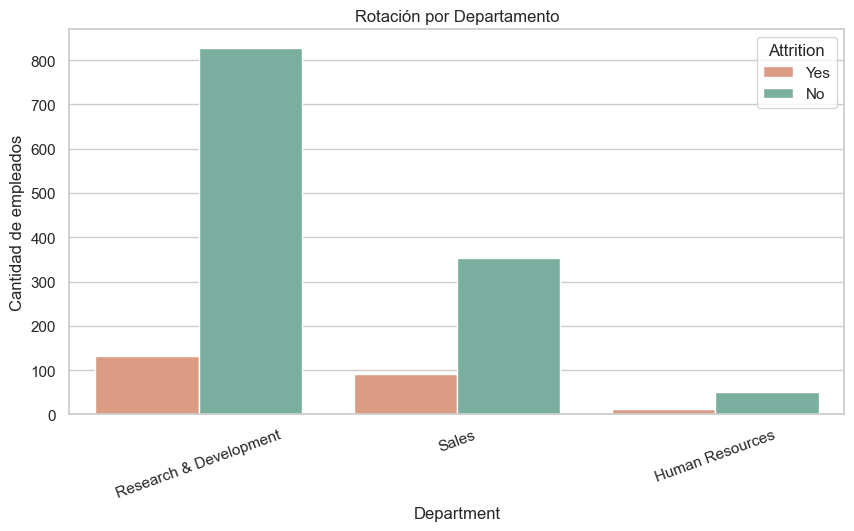

In [26]:
# Rotación por Área (Department)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition", palette=["#72b6a1", "#e99675"][::-1] , order=df["Department"].value_counts().index)
plt.title("Rotación por Departamento")
plt.xticks(rotation=20)
plt.ylabel("Cantidad de empleados")
plt.show()

Aunque Research & Development tiene las mayores cifras, el análisis proporcional muestra que Sales tiene una tasa de rotación relativa más alta.
Esto sugiere que las condiciones del área de ventas pueden estar influyendo en la permanencia del personal.

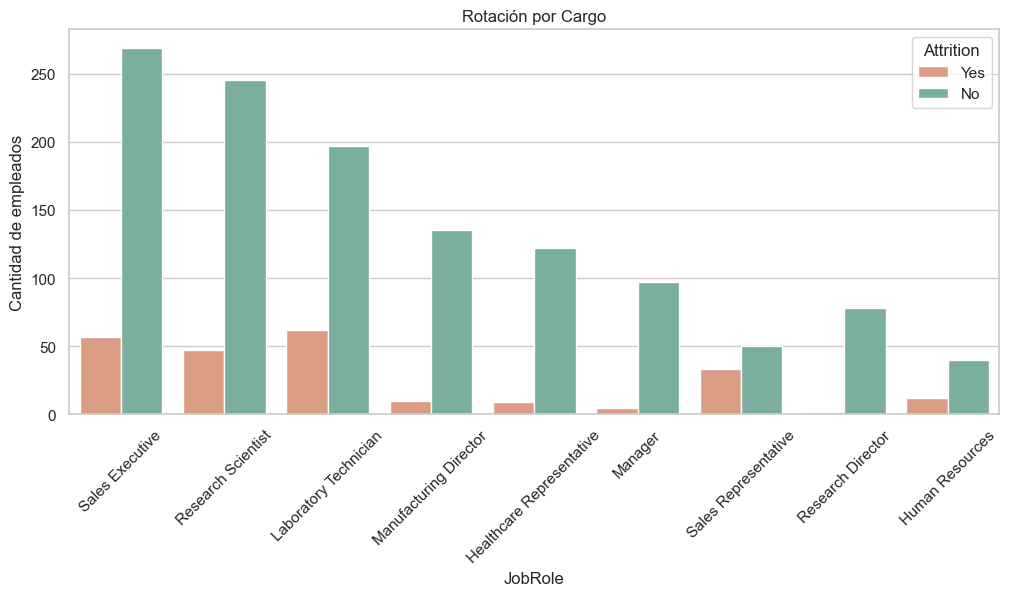

In [27]:
# Rotación por Cargo (JobRole)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition", palette=["#72b6a1", "#e99675"][::-1])
plt.title("Rotación por Cargo")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de empleados")
plt.show()

La rotación es más fuerte en posiciones técnicas operativas y comerciales (Laboratory Technician, Sales Executive, Research Scientist ,Sales Representative), mientras que los cargos directivos o de supervisión muestran alta estabilidad.

In [28]:
# Rotación según Nivel Salarial
df["RangoSalario"] = pd.qcut(df["MonthlyIncome"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])
df.loc[:,["MonthlyIncome", "RangoSalario"]]

,MonthlyIncome,RangoSalario
0,5993,Medio-Alto
1,5130,Medio-Alto
2,2090,Bajo
3,2909,Bajo
4,3468,Medio-Bajo
...,...,...
1465,2571,Bajo
1466,9991,Alto
1467,6142,Medio-Alto
1468,5390,Medio-Alto


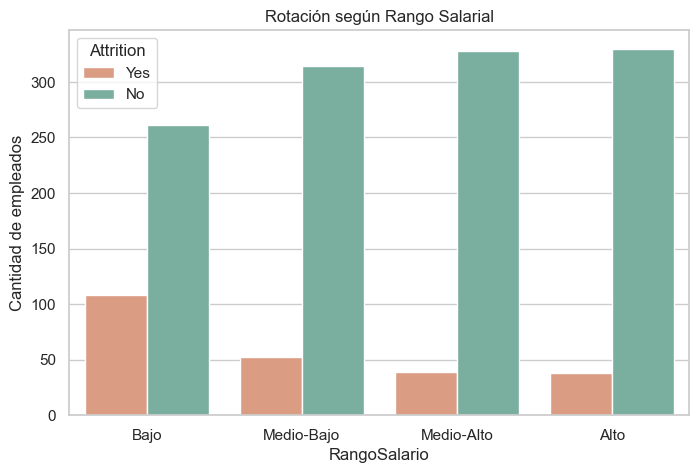

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="RangoSalario", hue="Attrition", palette=["#72b6a1", "#e99675"][::-1])
plt.title("Rotación según Rango Salarial")
plt.ylabel("Cantidad de empleados")
plt.show()

Existe una relación inversa clara entre salario y rotación:
- A menor salario, mayor rotación.
- A mayor salario, menor rotación.

### Conclusión General
La rotación es mayor en algunos cargos, áreas y rangos salariales específicos; sin embargo, se observa con más fuerza en los rangos salariales bajos y, proporcionalmente, en el área de Sales. Esto sugiere que tanto el nivel salarial como las condiciones propias de ciertos departamentos influyen directamente en la decisión de los empleados de abandonar la organización.

### Recomendación
La empresa podría emplear un plan enfocado en estas áreas, revisando su estructura salarial, y considerando dar incentivos adicionales. Al mismo tiempo, sería conveniente evaluar las condiciones laborales e identificar posibles factores que provoquen estrés o desmotivación y, con ello, disminuir de manera efectiva la rotación.

C:\Users\raulm\AppData\Local\Temp\ipykernel_13448\2018368368.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20)
C:\Users\raulm\AppData\Local\Temp\ipykernel_13448\2018368368.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


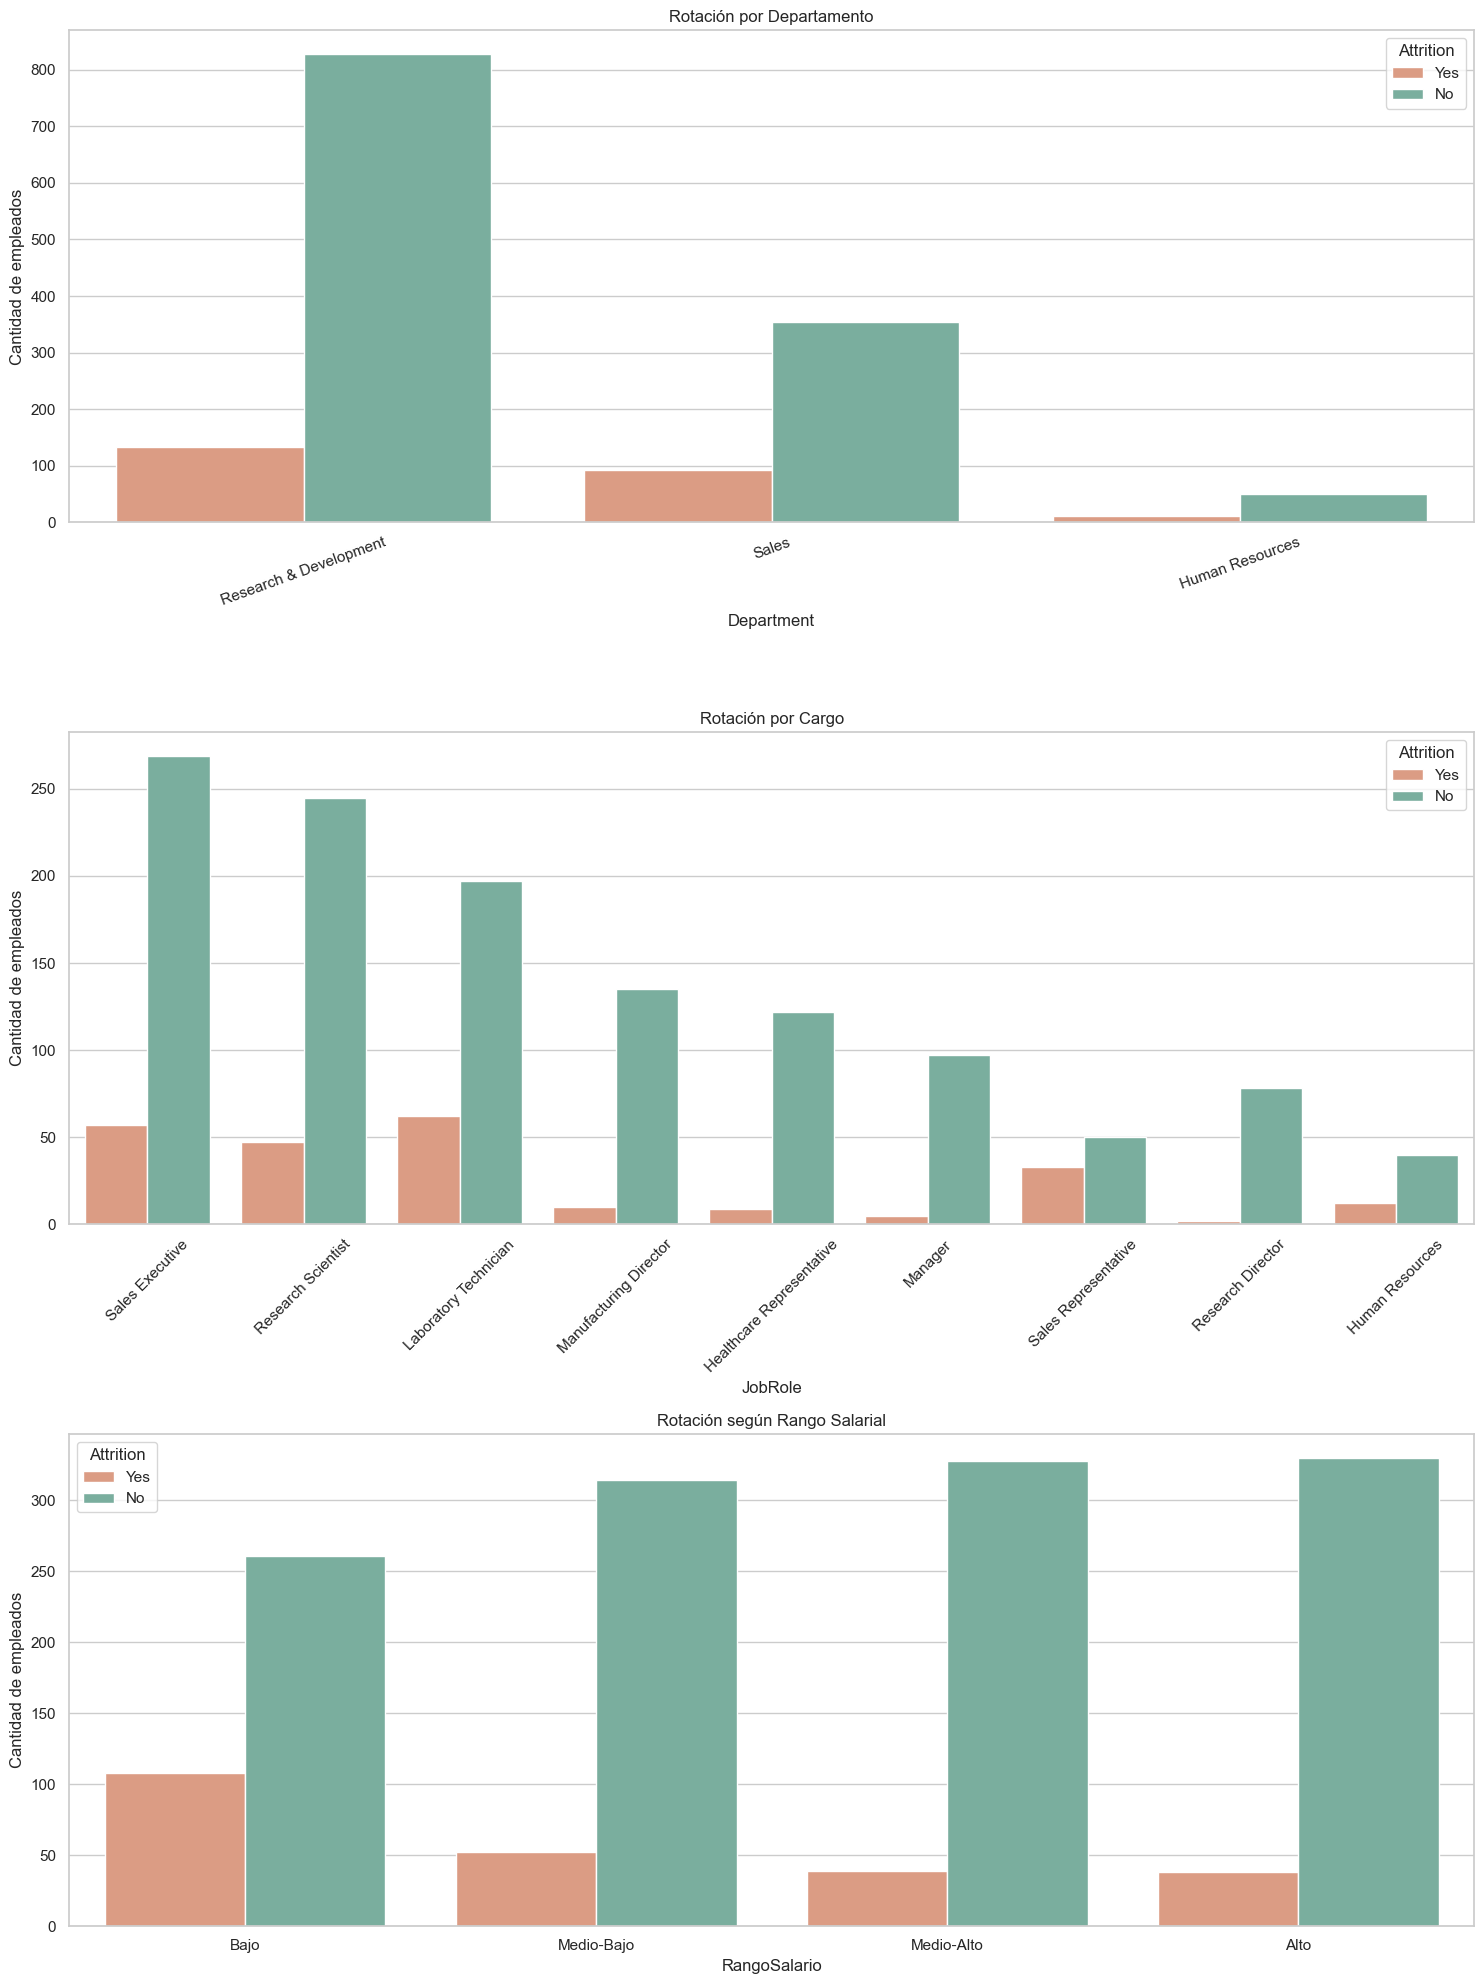

In [ ]:
fig, axes = plt.subplots(3,1 , figsize=(15,20))
palette = ["#72b6a1", "#e99675"][::-1]

# 1. Rotación por Department
sns.countplot(data=df, x="Department", hue="Attrition",
              palette=palette,
              order=df["Department"].value_counts().index,
              ax=axes[0])
axes[0].set_title("Rotación por Departamento")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Cantidad de empleados")

# --- 2. Rotación por JobRole ---
sns.countplot(data=df, x="JobRole", hue="Attrition",
              palette=palette,
              ax=axes[1])
axes[1].set_title("Rotación por Cargo")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Cantidad de empleados")

# --- 3. Rotación por Rango Salarial ---
sns.countplot(data=df, x="RangoSalario", hue="Attrition",
              palette=palette,
              ax=axes[2])
axes[2].set_title("Rotación según Rango Salarial")
axes[2.set_xticklabels(axes[1].get_xticklabels(), rotation=45)]
axes[2].set_ylabel("Cantidad de empleados")

# Ajustar espacios
plt.tight_layout()
plt.show()


C:\Users\raulm\AppData\Local\Temp\ipykernel_13448\3092378407.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


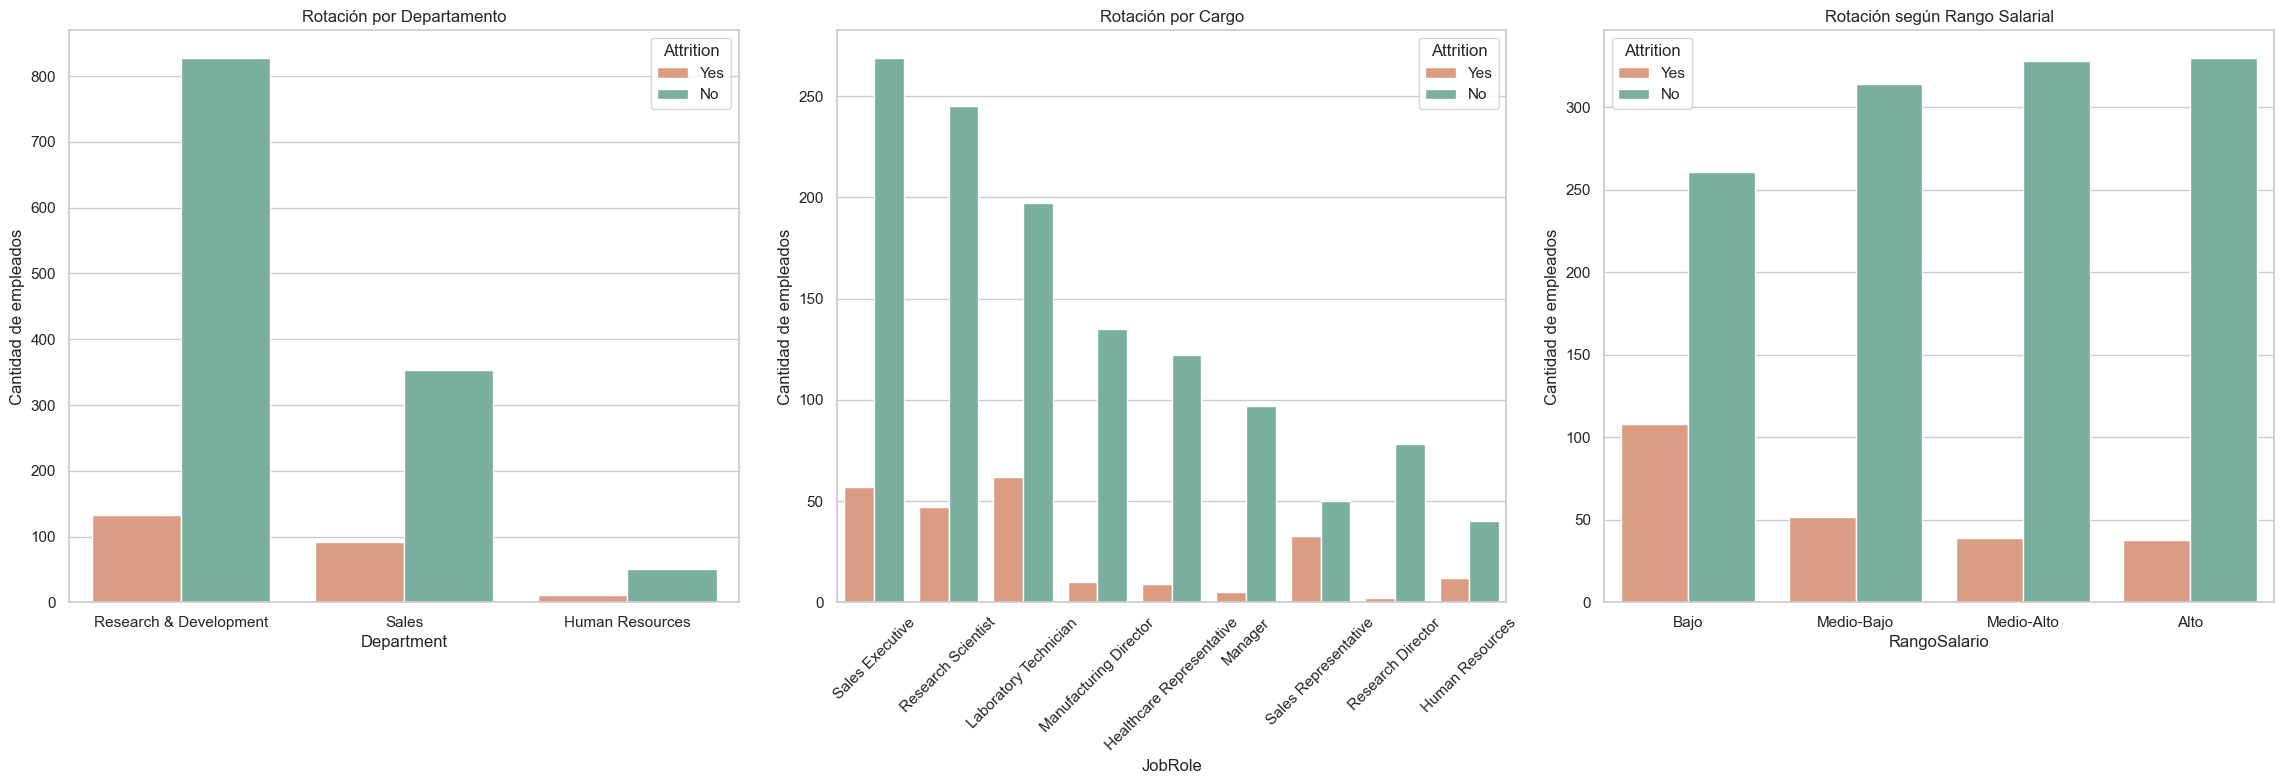

In [67]:
fig, axes = plt.subplots(1,3 , figsize=(23, 8))
palette = ["#72b6a1", "#e99675"][::-1]

# 1. Rotación por Department
sns.countplot(data=df, x="Department", hue="Attrition",
              palette=palette,
              order=df["Department"].value_counts().index,
              ax=axes[0])
axes[0].set_title("Rotación por Departamento")
axes[0].set_ylabel("Cantidad de empleados")

# --- 2. Rotación por JobRole ---
sns.countplot(data=df, x="JobRole", hue="Attrition",
              palette=palette,
              ax=axes[1])
axes[1].set_title("Rotación por Cargo")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Cantidad de empleados")

# --- 3. Rotación por Rango Salarial ---
sns.countplot(data=df, x="RangoSalario", hue="Attrition",
              palette=palette,
              ax=axes[2])
axes[2].set_title("Rotación según Rango Salarial")
axes[2].set_ylabel("Cantidad de empleados")

# Ajustar espacios
plt.tight_layout()
plt.show()
